<a href="https://colab.research.google.com/github/ashu-wadekar1/Machine-learning-Projects/blob/main/Customer_Lifetime_Value_Prediction_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Customer Lifetime Value Prediction**

Customer Lifetime Value represents a customer’s value to a company over a period of time. It’s a competitive market for insurance companies in 2019, and insurance premium isn’t the only determining factor in a customer’s decisions. CLV is a customer-centric metric, and a powerful base to build upon to retain valuable customers, increase revenue from less valuable customers, and improve the customer experience overall.

# **Business Problem**

An Auto Insurance company in the USA is facing issues in retaining its customers and wants to advertise promotional offers for its loyal customers. They are considering Customer Lifetime Value CLV as a parameter for this purpose. Customer Lifetime Value represents a customer’s value to a company over a period of time. It’s a competitive market for insurance companies, and the insurance premium isn’t the only determining factor in a customer’s decisions. CLV is a customer-centric metric, and a powerful base to build upon to retain valuable customers, increase revenue from less valuable customers, and improve the customer experience overall. Using CLV effectively can improve customer acquisition and customer retention, prevent churn, help the company to plan its marketing budget, measure the performance of their ads in more detail, and much more.

# **Project Overview**

The objective of the problem is to accurately predict the Customer Lifetime Value(CLV) of the customer for an Auto Insurance Company
- Performed EDA to understand the relation of target variable CLV with the other features.
- Statistical Analysis techniques like OLS for numerical and Mann–Whitney U and also Kruskal Wallis test for the categorical variables were performed to find the significance of the features with respect to the target.
- Supervised Regression Models like Linear Regression, Ridge Regression, Lasso Regression, DecisionTree Regression, Random Forest Regression and Adaboost Regression.
- Using GridSearchCV with Random Forest Regression gave the best RMSE and R^2 score values

# **Dataset Description**

The dataset represents Customer lifetime value of an Auto Insurance Company in the United States, it includes over 24 features and 9134 records to analyze the lifetime value of Customer.

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats

In [ ]:
df=pd.read_csv("AutoInsurance.csv")
df.head()

,Customer,State,Customer Lifetime Value,Response,Coverage,Education,Effective To Date,EmploymentStatus,Gender,Income,...,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Policy Type,Policy,Renew Offer Type,Sales Channel,Total Claim Amount,Vehicle Class,Vehicle Size
0,BU79786,Washington,2763.519279,No,Basic,Bachelor,2/24/11,Employed,F,56274,...,5,0,1,Corporate Auto,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,Medsize
1,QZ44356,Arizona,6979.535903,No,Extended,Bachelor,1/31/11,Unemployed,F,0,...,42,0,8,Personal Auto,Personal L3,Offer3,Agent,1131.464935,Four-Door Car,Medsize
2,AI49188,Nevada,12887.431650,No,Premium,Bachelor,2/19/11,Employed,F,48767,...,38,0,2,Personal Auto,Personal L3,Offer1,Agent,566.472247,Two-Door Car,Medsize
3,WW63253,California,7645.861827,No,Basic,Bachelor,1/20/11,Unemployed,M,0,...,65,0,7,Corporate Auto,Corporate L2,Offer1,Call Center,529.881344,SUV,Medsize
4,HB64268,Washington,2813.692575,No,Basic,Bachelor,3/2/2011,Employed,M,43836,...,44,0,1,Personal Auto,Personal L1,Offer1,Agent,138.130879,Four-Door Car,Medsize


In [ ]:
print("The number of rows:",df.shape[0])
print("The number of columns:",df.shape[1])

The number of rows: 9134
The number of columns: 24


In [ ]:
df.rename(columns={'Customer Lifetime Value':'CLV'},inplace=True)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9134 entries, 0 to 9133
Data columns (total 24 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Customer                       9134 non-null   object 
 1   State                          9134 non-null   object 
 2   CLV                            9134 non-null   float64
 3   Response                       9134 non-null   object 
 4   Coverage                       9134 non-null   object 
 5   Education                      9134 non-null   object 
 6   Effective To Date              9134 non-null   object 
 7   EmploymentStatus               9134 non-null   object 
 8   Gender                         9134 non-null   object 
 9   Income                         9134 non-null   int64  
 10  Location Code                  9134 non-null   object 
 11  Marital Status                 9134 non-null   object 
 12  Monthly Premium Auto           9134 non-null   i

In [ ]:
numerical_cols = df.select_dtypes(include=["int64","float64"])

In [ ]:
numerical_cols.columns

Index(['CLV', 'Income', 'Monthly Premium Auto', 'Months Since Last Claim',
       'Months Since Policy Inception', 'Number of Open Complaints',
       'Number of Policies', 'Total Claim Amount'],
      dtype='object')

In [ ]:
numerical_cols = numerical_cols.drop(["Number of Policies","Number of Open Complaints"],axis=1)

# **Summary Statistics of Numerical features**

In [ ]:
numerical_cols.describe()

,CLV,Income,Monthly Premium Auto,Months Since Last Claim,Months Since Policy Inception,Total Claim Amount
count,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000
mean,8004.940475,37657.380009,93.219291,15.097000,48.064594,434.088794
std,6870.967608,30379.904734,34.407967,10.073257,27.905991,290.500092
min,1898.007675,0.000000,61.000000,0.000000,0.000000,0.099007
25%,3994.251794,0.000000,68.000000,6.000000,24.000000,272.258244
50%,5780.182197,33889.500000,83.000000,14.000000,48.000000,383.945434
75%,8962.167041,62320.000000,109.000000,23.000000,71.000000,547.514839
max,83325.381190,99981.000000,298.000000,35.000000,99.000000,2893.239678


# **Checking Null values**

In [ ]:
df.isnull().sum()

Customer                         0
State                            0
CLV                              0
Response                         0
Coverage                         0
Education                        0
Effective To Date                0
EmploymentStatus                 0
Gender                           0
Income                           0
Location Code                    0
Marital Status                   0
Monthly Premium Auto             0
Months Since Last Claim          0
Months Since Policy Inception    0
Number of Open Complaints        0
Number of Policies               0
Policy Type                      0
Policy                           0
Renew Offer Type                 0
Sales Channel                    0
Total Claim Amount               0
Vehicle Class                    0
Vehicle Size                     0
dtype: int64

There are no null values in the data

# **EDA**

# **Numerical Features**

### **CLV - Target variable analysis**

<ipython-input-11-639c63b2c30f>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df["CLV"])


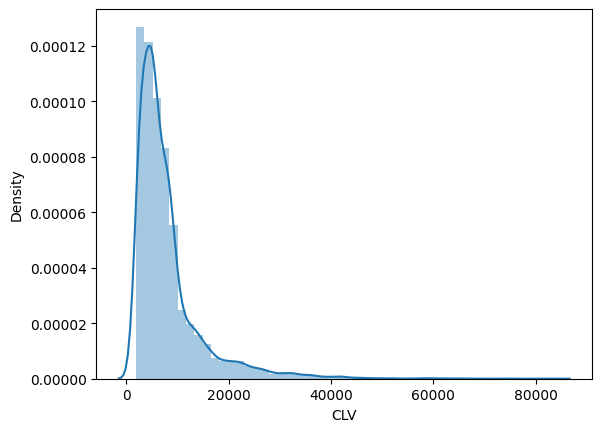

In [ ]:
sns.distplot(df["CLV"])
# plt.savefig("CLV.png")
plt.show()

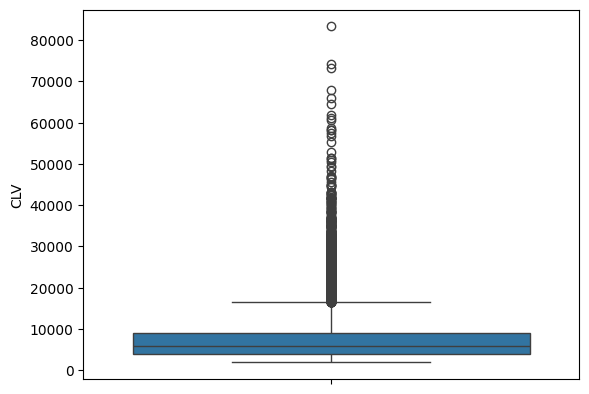

In [ ]:
sns.boxplot(df["CLV"])
plt.show()

**From the distribution and box plot we can infer that CLV is highly right skewed. There are lot of outliers in our dependent variable but we cant treat them directly because they are influential points.**

# **Income**

**Univariate Analysis**

<ipython-input-13-ffd47b6b5651>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df["Income"])


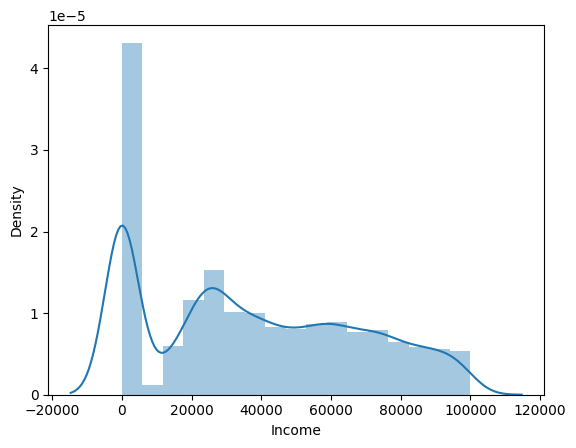

In [ ]:
sns.distplot(df["Income"])
plt.show()

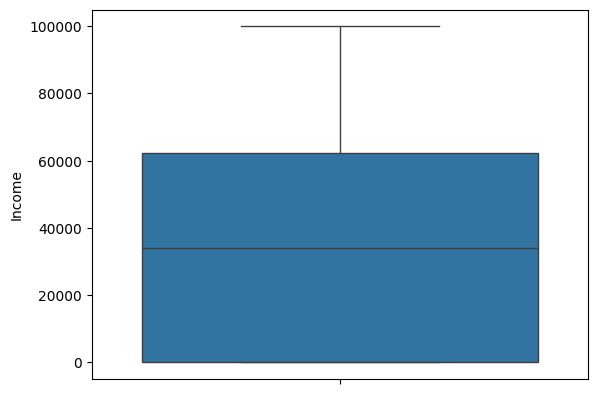

In [ ]:
sns.boxplot(df["Income"])
plt.show()

# **Bivariate Analysis**

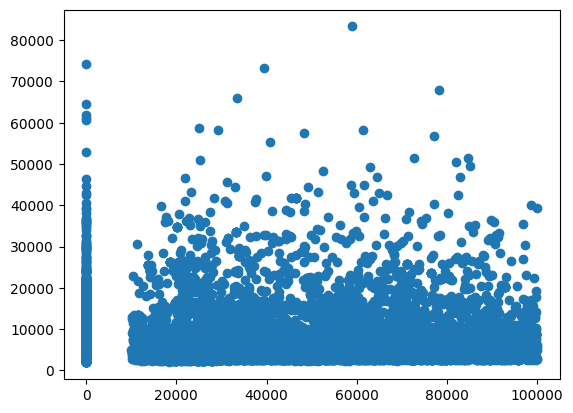

In [ ]:
plt.scatter(df["Income"], df["CLV"])
plt.show()

**There is no linear relationship between income and CLV**

# **Monthly Premium Auto**

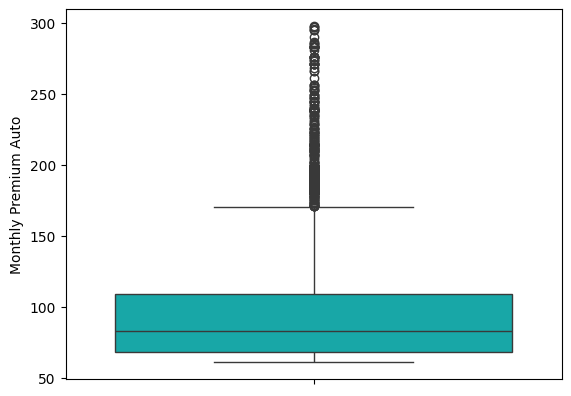

In [ ]:
sns.boxplot(df["Monthly Premium Auto"],color='c')
plt.show()

**Bivariate Analysis**

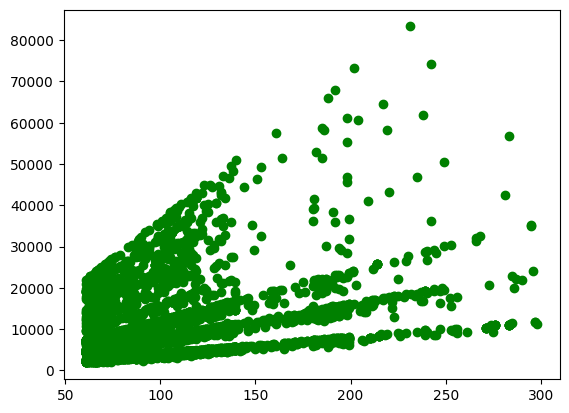

In [ ]:
plt.scatter(df["Monthly Premium Auto"],df["CLV"],color='g')
#plt.savefig("bi.png")
plt.show()

**There is linear relationship between income and CLV**

# **Months Since Last Claim**

<ipython-input-18-a5d715d00e85>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df["Months Since Last Claim"])


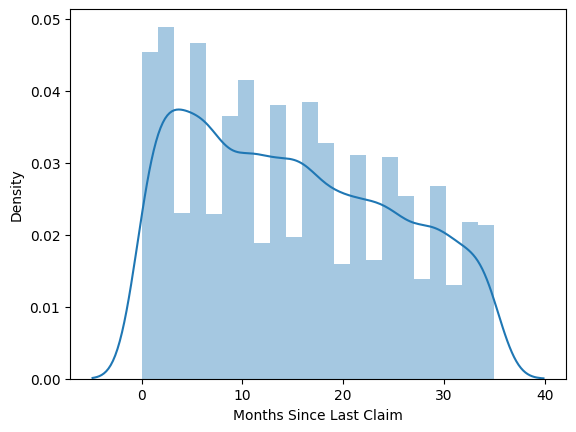

In [ ]:
sns.distplot(df["Months Since Last Claim"])
plt.show()

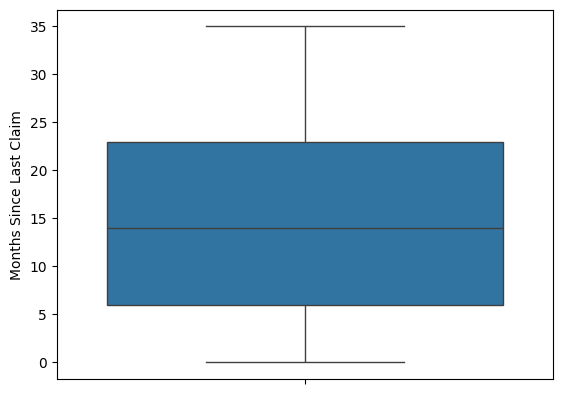

In [ ]:
sns.boxplot(df["Months Since Last Claim"])
plt.show()

**Bivariate Analysis**

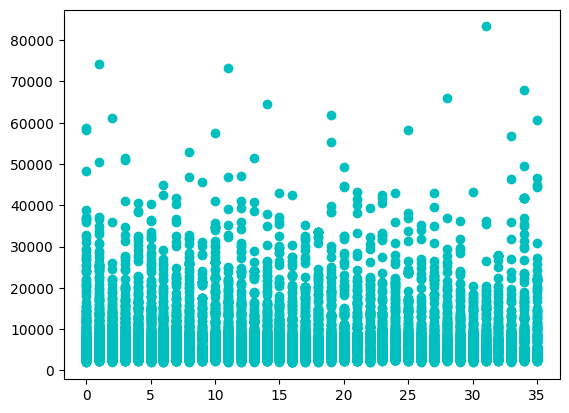

In [ ]:
plt.scatter(df["Months Since Last Claim"],df["CLV"],color='c')
plt.show()

**There is no linear relationship**

# **Months Since Policy Inception**

<ipython-input-21-16ddb0b3c524>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df["Months Since Policy Inception"])


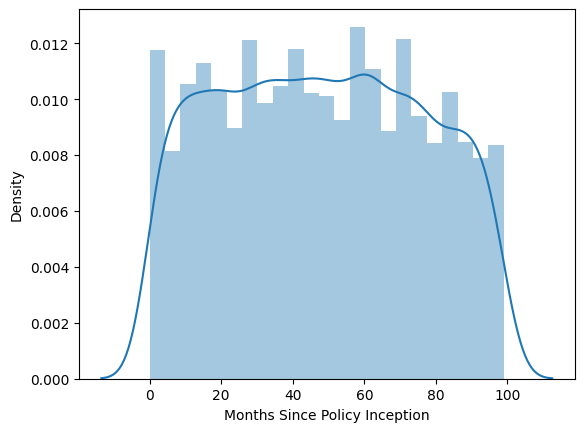

In [ ]:
sns.distplot(df["Months Since Policy Inception"])
plt.show()

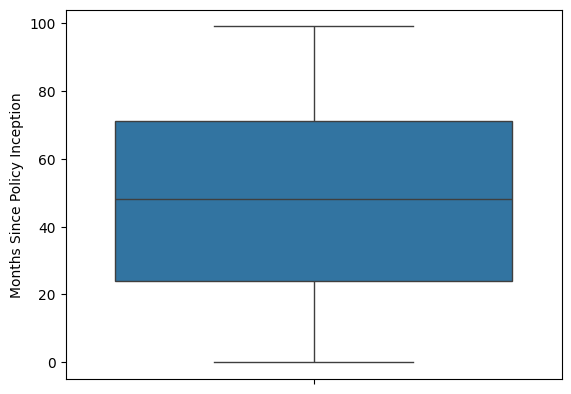

In [ ]:
sns.boxplot(df["Months Since Policy Inception"])
plt.show()

# **Total claim amount**

<ipython-input-23-e78db172f4f4>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Total Claim Amount'])


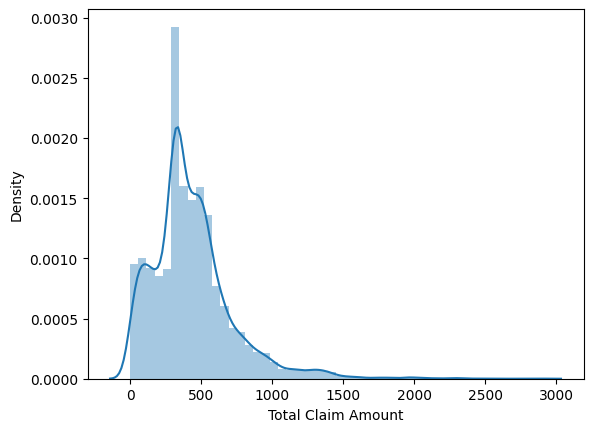

In [ ]:
sns.distplot(df['Total Claim Amount'])
plt.show()

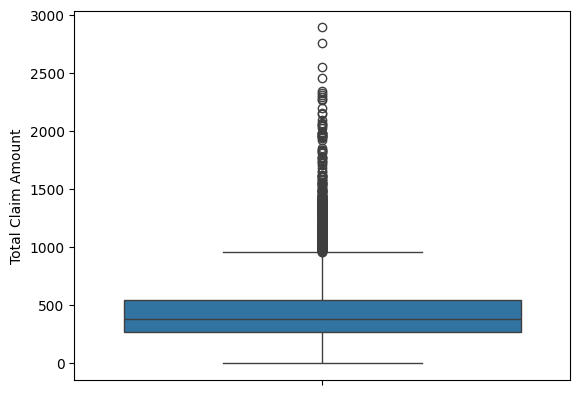

In [ ]:
sns.boxplot(df["Total Claim Amount"])
plt.show()

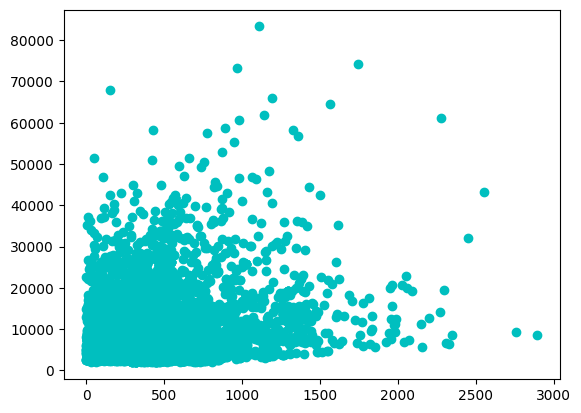

In [ ]:
plt.scatter(df["Total Claim Amount"],df["CLV"],color='c')
plt.show()

**There is a linear relationship between CLV and Total Claim Amount**

**The monthly premium auto and income feature has multiple peak's so to remove those peaks we can apply any of the power transformation (SQUARE / CUBE)**

<ipython-input-26-577edc81b77a>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(np.square(df["Monthly Premium Auto"]),color='r')


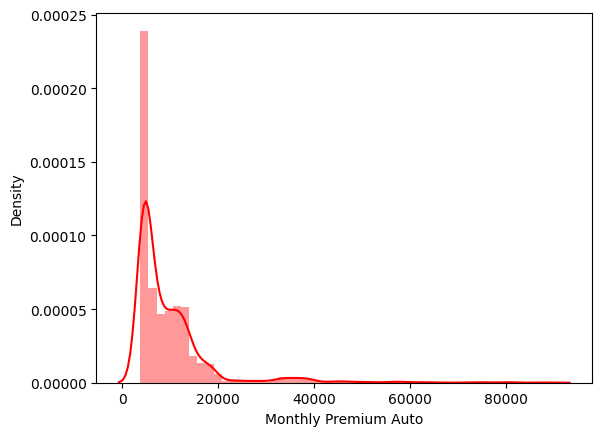

In [ ]:
sns.distplot(np.square(df["Monthly Premium Auto"]),color='r')
plt.show()

**But as we can see that after the square transformation the data is getting heavily skewed, so we stick with the actual distribution again. We will just stick with the actual distribution of the feature in our model building.**

# **Categorical variables**

In [ ]:
cat_cols = df.select_dtypes(include="object")

In [ ]:
no_col = df[["Number of Open Complaints","Number of Policies"]]

In [ ]:
cat_cols = pd.concat([cat_cols,no_col],axis=1)

In [ ]:
cat_cols.head()

,Customer,State,Response,Coverage,Education,Effective To Date,EmploymentStatus,Gender,Location Code,Marital Status,Policy Type,Policy,Renew Offer Type,Sales Channel,Vehicle Class,Vehicle Size,Number of Open Complaints,Number of Policies
0,BU79786,Washington,No,Basic,Bachelor,2/24/11,Employed,F,Suburban,Married,Corporate Auto,Corporate L3,Offer1,Agent,Two-Door Car,Medsize,0,1
1,QZ44356,Arizona,No,Extended,Bachelor,1/31/11,Unemployed,F,Suburban,Single,Personal Auto,Personal L3,Offer3,Agent,Four-Door Car,Medsize,0,8
2,AI49188,Nevada,No,Premium,Bachelor,2/19/11,Employed,F,Suburban,Married,Personal Auto,Personal L3,Offer1,Agent,Two-Door Car,Medsize,0,2
3,WW63253,California,No,Basic,Bachelor,1/20/11,Unemployed,M,Suburban,Married,Corporate Auto,Corporate L2,Offer1,Call Center,SUV,Medsize,0,7
4,HB64268,Washington,No,Basic,Bachelor,3/2/2011,Employed,M,Rural,Single,Personal Auto,Personal L1,Offer1,Agent,Four-Door Car,Medsize,0,1


In [ ]:
cat_cols.drop("Effective To Date",axis=1,inplace=True)

In [ ]:
cat_cols.columns

Index(['Customer', 'State', 'Response', 'Coverage', 'Education',
       'EmploymentStatus', 'Gender', 'Location Code', 'Marital Status',
       'Policy Type', 'Policy', 'Renew Offer Type', 'Sales Channel',
       'Vehicle Class', 'Vehicle Size', 'Number of Open Complaints',
       'Number of Policies'],
      dtype='object')

In [ ]:
for i in cat_cols:
    print("Unique values in",str(i),"is",df[i].nunique())
    print(df[i].value_counts())
    print("----------------------------------------")

Unique values in Customer is 9134
BU79786    1
PU81096    1
CO75086    1
WW52683    1
XO38850    1
          ..
HS14476    1
YL91587    1
CT18212    1
EW35231    1
Y167826    1
Name: Customer, Length: 9134, dtype: int64
----------------------------------------
Unique values in State is 5
California    3150
Oregon        2601
Arizona       1703
Nevada         882
Washington     798
Name: State, dtype: int64
----------------------------------------
Unique values in Response is 2
No     7826
Yes    1308
Name: Response, dtype: int64
----------------------------------------
Unique values in Coverage is 3
Basic       5568
Extended    2742
Premium      824
Name: Coverage, dtype: int64
----------------------------------------
Unique values in Education is 5
Bachelor                2748
College                 2681
High School or Below    2622
Master                   741
Doctor                   342
Name: Education, dtype: int64
----------------------------------------
Unique values in Employm

**Customer column which is the id has unique values for all records so it can be removed for model building as it adds no significance**

# **State**

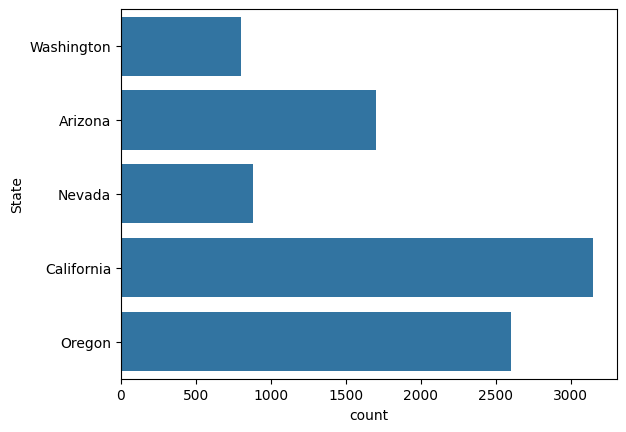

In [ ]:
sns.countplot(df["State"])
plt.show()

**Most number of people are residing in california**

# **Response**

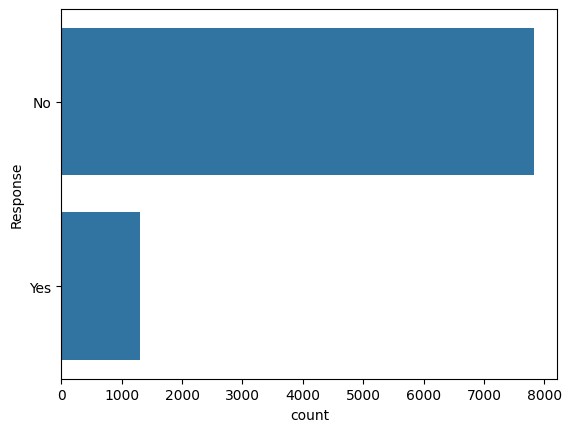

In [ ]:
sns.countplot(df["Response"])
plt.show()

**Its seems that less than 1400 customers have responded to the marketing calls**

# **Coverage**

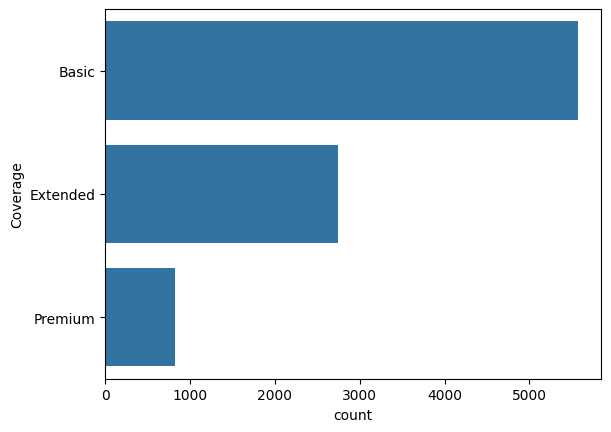

In [ ]:
sns.countplot(df["Coverage"])
plt.show()

# **Education**

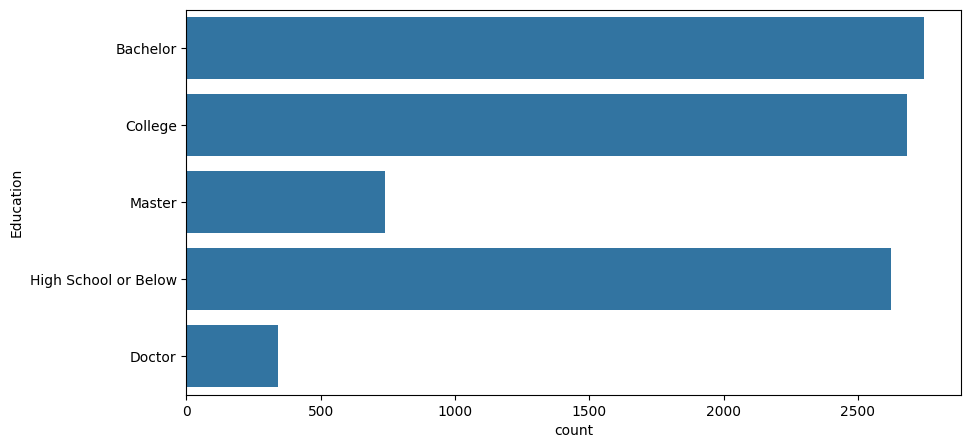

In [ ]:
plt.figure(figsize=(10,5))
sns.countplot(df["Education"])
plt.show()

**Most of the customers have either a bachelor or college degree**

# **EmploymentStatus**

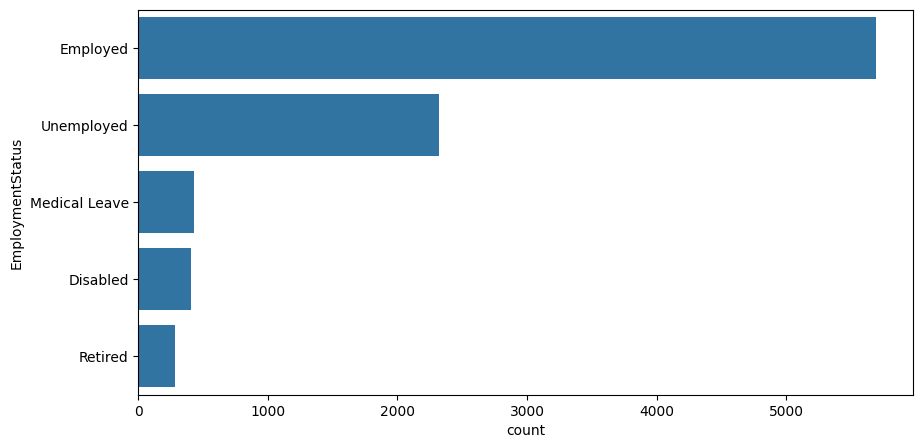

In [ ]:
plt.figure(figsize=(10,5))
sns.countplot(df["EmploymentStatus"])
# plt.savefig("empstatus.png")
plt.show()

In [ ]:
df["EmploymentStatus"].value_counts(normalize=True)*100

Employed         62.382308
Unemployed       25.366762
Medical Leave     4.729582
Disabled          4.433983
Retired           3.087366
Name: EmploymentStatus, dtype: float64

**Around 62.38% of the customers are employed**

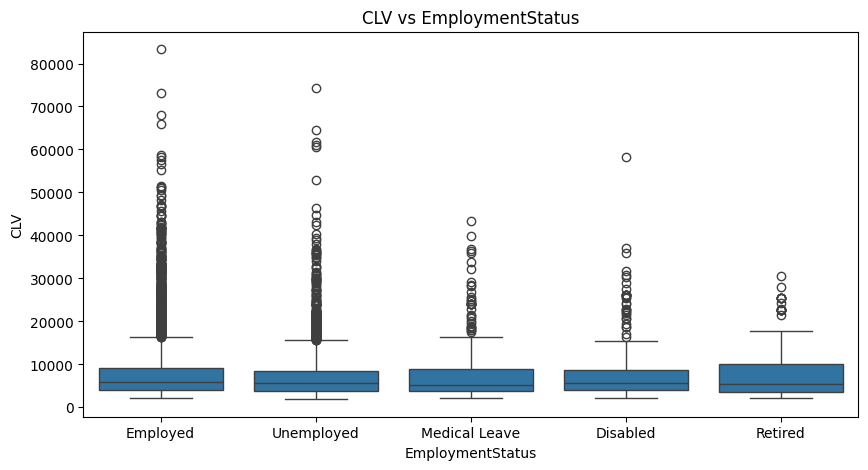

In [ ]:
plt.figure(figsize=(10,5))
sns.boxplot(x=df['EmploymentStatus'],y=df['CLV'])
plt.title("CLV vs EmploymentStatus")
# plt.savefig("bi1.png")
plt.show()

# **Gender**

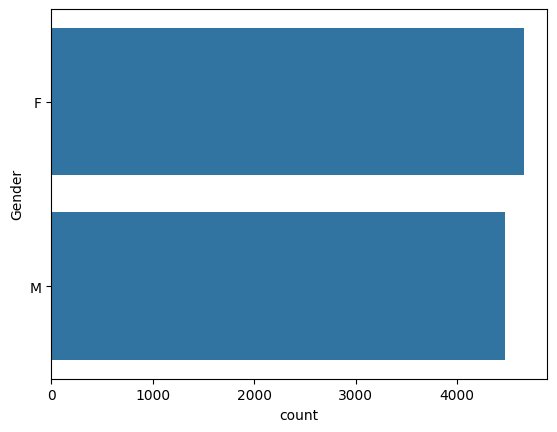

In [ ]:
sns.countplot(df["Gender"])
plt.show()

# **Location Code**

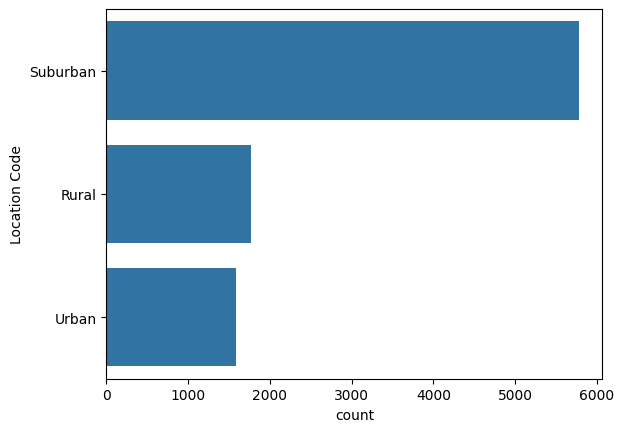

In [ ]:
sns.countplot(df["Location Code"])
plt.savefig("location.png")
plt.show()

# **Marital Status**

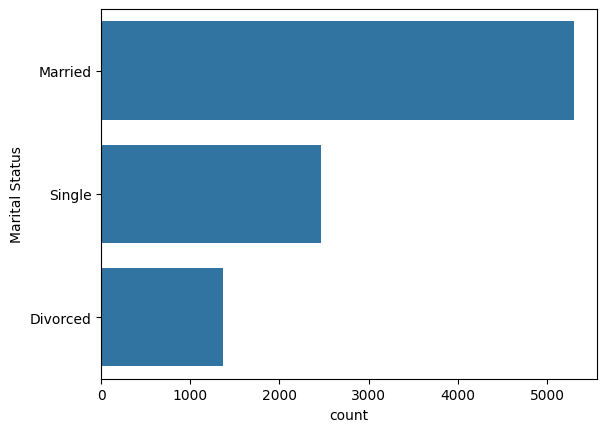

In [ ]:
sns.countplot(df["Marital Status"])
plt.show()

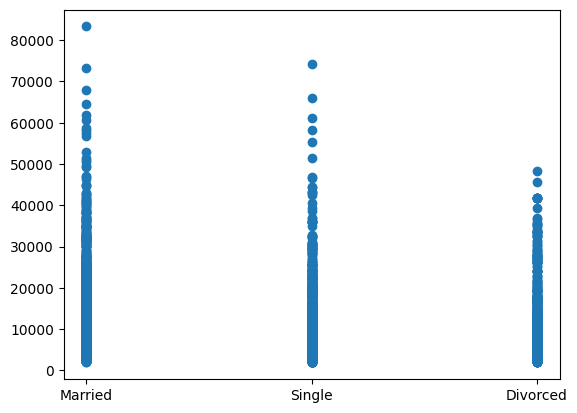

In [ ]:
plt.scatter(df["Marital Status"],df["CLV"])
plt.show()

# **Policy Type**

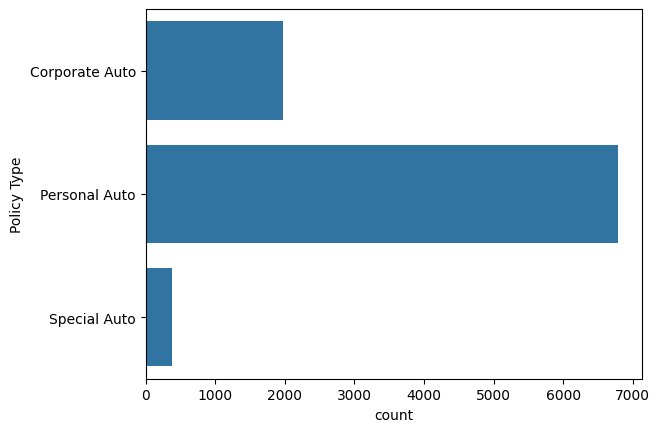

In [ ]:
sns.countplot(df["Policy Type"])
plt.show()

# **Policy**

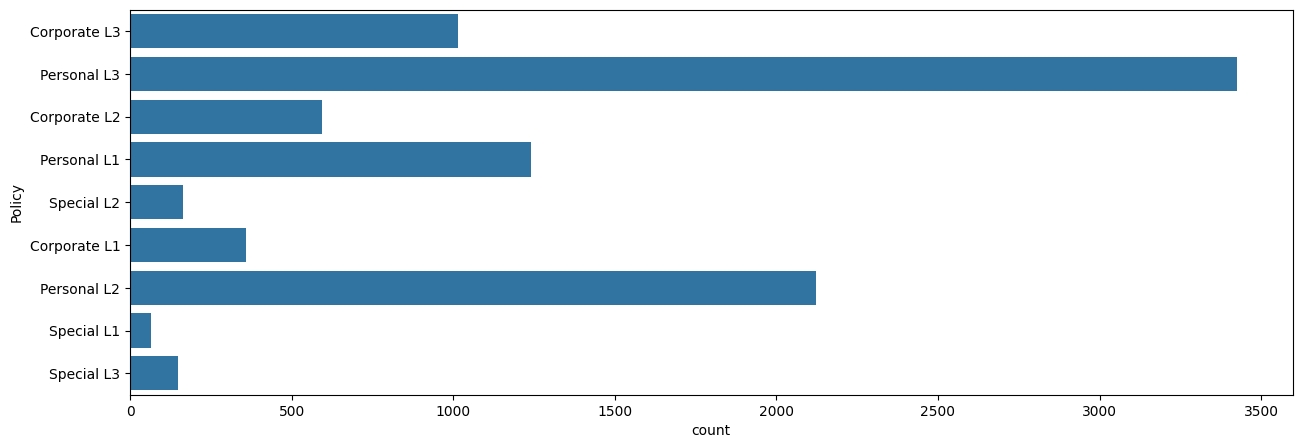

In [ ]:
plt.figure(figsize=(15,5))
sns.countplot(df["Policy"])
plt.show()

**Personal L3 policy subcategory has the most number of customers**

# **Renew Offer Type**

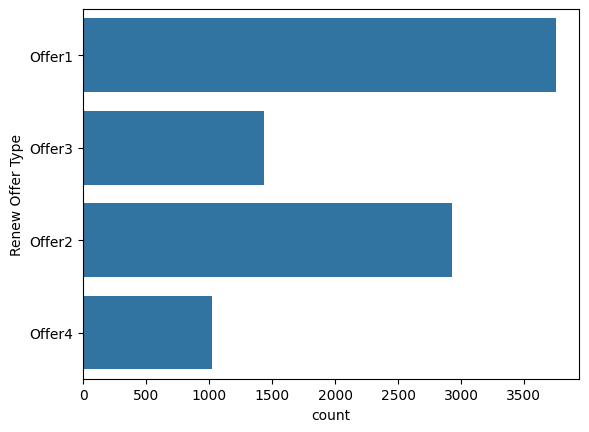

In [ ]:
sns.countplot(df["Renew Offer Type"])
plt.show()

# **Sales channel**

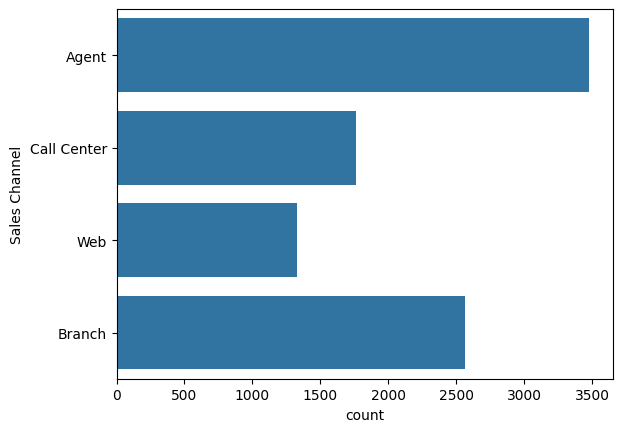

In [ ]:
sns.countplot(df["Sales Channel"])
plt.show()

# **Vehicle Class**

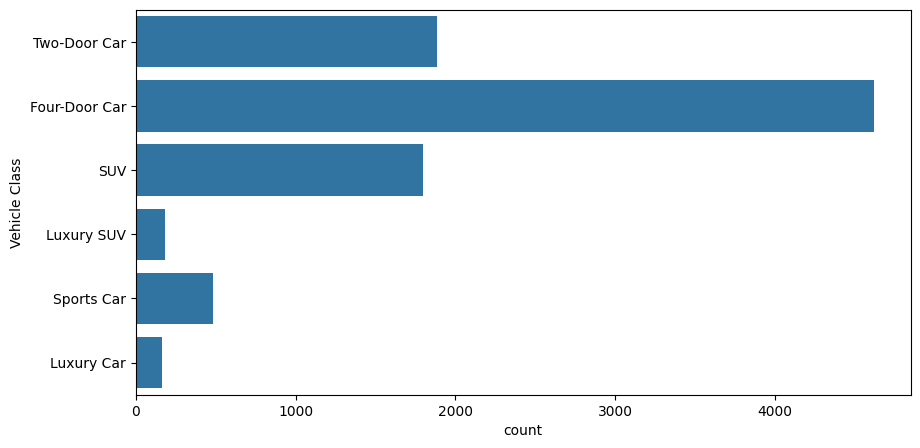

In [ ]:
plt.figure(figsize=(10,5))
sns.countplot(df["Vehicle Class"])
plt.show()

# **Vehicle Size**

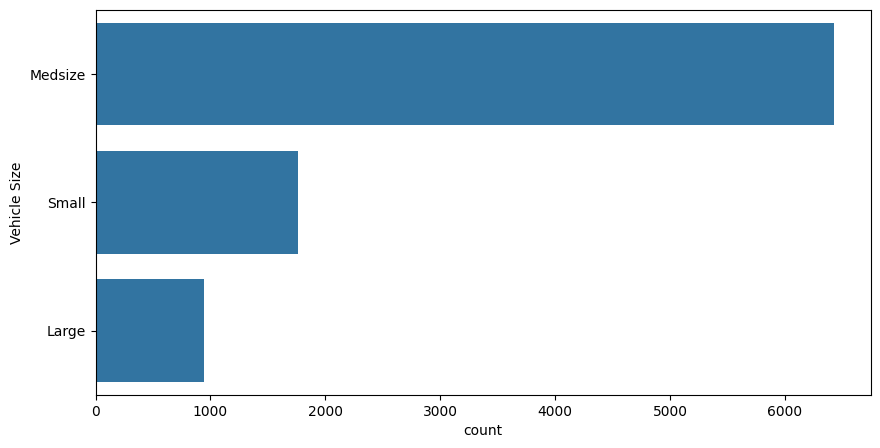

In [ ]:
plt.figure(figsize=(10,5))
sns.countplot(df["Vehicle Size"])
plt.show()

In [ ]:
df['Effective To Date']=pd.to_datetime(df['Effective To Date'],infer_datetime_format=True)

In [ ]:
df["Months"] = df["Effective To Date"].dt.month

In [ ]:
df['Months'] = df['Months'].astype('object')

# **Months**

In [ ]:
df.head(2)

,Customer,State,CLV,Response,Coverage,Education,Effective To Date,EmploymentStatus,Gender,Income,...,Number of Open Complaints,Number of Policies,Policy Type,Policy,Renew Offer Type,Sales Channel,Total Claim Amount,Vehicle Class,Vehicle Size,Months
0,BU79786,Washington,2763.519279,No,Basic,Bachelor,2011-02-24,Employed,F,56274,...,0,1,Corporate Auto,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,Medsize,2
1,QZ44356,Arizona,6979.535903,No,Extended,Bachelor,2011-01-31,Unemployed,F,0,...,0,8,Personal Auto,Personal L3,Offer3,Agent,1131.464935,Four-Door Car,Medsize,1


Text(0.5, 1.0, 'Bar Graph of Months')

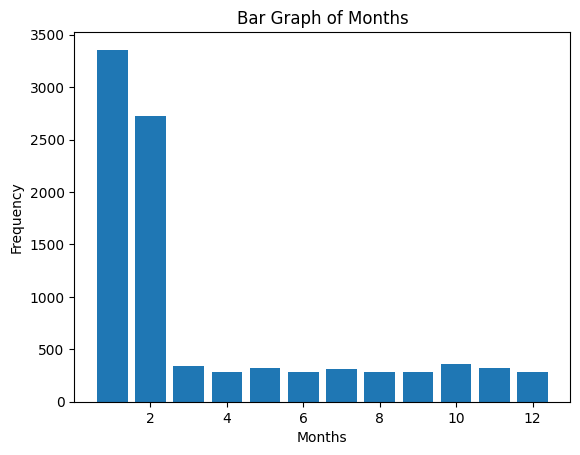

In [ ]:
# Count the occurrences of each month
month_counts = df['Months'].value_counts()

#Sort the months by their index (month names)
month_counts = month_counts.sort_index()

#Create the bar graph
plt.bar(month_counts.index,month_counts.values)

# Adding labels and title
plt.xlabel('Months')
plt.ylabel('Frequency')
plt.title('Bar Graph of Months')

In [ ]:
cat_cols.columns

Index(['Customer', 'State', 'Response', 'Coverage', 'Education',
       'EmploymentStatus', 'Gender', 'Location Code', 'Marital Status',
       'Policy Type', 'Policy', 'Renew Offer Type', 'Sales Channel',
       'Vehicle Class', 'Vehicle Size', 'Number of Open Complaints',
       'Number of Policies'],
      dtype='object')

In [ ]:
df.columns

Index(['Customer', 'State', 'CLV', 'Response', 'Coverage', 'Education',
       'Effective To Date', 'EmploymentStatus', 'Gender', 'Income',
       'Location Code', 'Marital Status', 'Monthly Premium Auto',
       'Months Since Last Claim', 'Months Since Policy Inception',
       'Number of Open Complaints', 'Number of Policies', 'Policy Type',
       'Policy', 'Renew Offer Type', 'Sales Channel', 'Total Claim Amount',
       'Vehicle Class', 'Vehicle Size', 'Months'],
      dtype='object')

# **HeatMap**

In [ ]:
heatmap = df[['CLV','Income','Monthly Premium Auto','Total Claim Amount']]

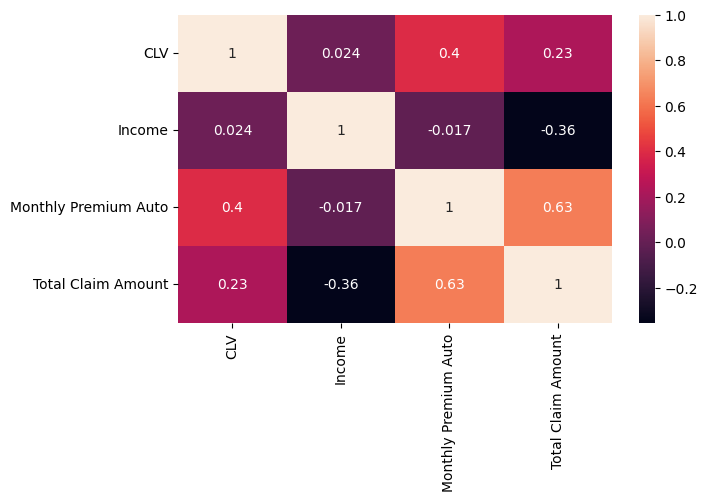

In [ ]:
plt.figure(figsize=(7,4))
sns.heatmap(heatmap.corr(),annot=True)
# plt.savefig("Heatmap.png")
plt.show()

**We can clearly see in the heatmap, that customer lifetime value has a better correlation with monthly premium auto and acceptable correlation with total claim amount.**

# **Statistical Significance**



*   H0:The null hypothesis of the test is the data is normally distributed
*   HA:The data is not normally distributed

In [ ]:
stats.shapiro(df['CLV'])

/usr/local/lib/python3.10/dist-packages/scipy/stats/_morestats.py:1882: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


ShapiroResult(statistic=0.7033725380897522, pvalue=0.0)

p-value less than 0.05 we reject null hypothesis the data is not normally distributed

We will proceed with non parametric tests since the dependent variable is not normally distributed

In [ ]:
columns_cat = list(cat_cols.columns)
columns_cat

['Customer',
 'State',
 'Response',
 'Coverage',
 'Education',
 'EmploymentStatus',
 'Gender',
 'Location Code',
 'Marital Status',
 'Policy Type',
 'Policy',
 'Renew Offer Type',
 'Sales Channel',
 'Vehicle Class',
 'Vehicle Size',
 'Number of Open Complaints',
 'Number of Policies']

In [ ]:
manwhiteneyy = []
anova = []

for i in columns_cat:
    if(df[i].nunique()>2):
      anova.append(i)
    else:
      manwhiteneyy.append(i)
print("Anova:",anova)
print("TTest:",manwhiteneyy)

Anova: ['Customer', 'State', 'Coverage', 'Education', 'EmploymentStatus', 'Location Code', 'Marital Status', 'Policy Type', 'Policy', 'Renew Offer Type', 'Sales Channel', 'Vehicle Class', 'Vehicle Size', 'Number of Open Complaints', 'Number of Policies']
TTest: ['Response', 'Gender']


**H0, the distributions of both populations are equal The alternative hypothesis H1 is that the distributions are not equal.**

# **Data Preprocessing**

In [ ]:
cat_cols.head()

,Customer,State,Response,Coverage,Education,EmploymentStatus,Gender,Location Code,Marital Status,Policy Type,Policy,Renew Offer Type,Sales Channel,Vehicle Class,Vehicle Size,Number of Open Complaints,Number of Policies
0,BU79786,Washington,No,Basic,Bachelor,Employed,F,Suburban,Married,Corporate Auto,Corporate L3,Offer1,Agent,Two-Door Car,Medsize,0,1
1,QZ44356,Arizona,No,Extended,Bachelor,Unemployed,F,Suburban,Single,Personal Auto,Personal L3,Offer3,Agent,Four-Door Car,Medsize,0,8
2,AI49188,Nevada,No,Premium,Bachelor,Employed,F,Suburban,Married,Personal Auto,Personal L3,Offer1,Agent,Two-Door Car,Medsize,0,2
3,WW63253,California,No,Basic,Bachelor,Unemployed,M,Suburban,Married,Corporate Auto,Corporate L2,Offer1,Call Center,SUV,Medsize,0,7
4,HB64268,Washington,No,Basic,Bachelor,Employed,M,Rural,Single,Personal Auto,Personal L1,Offer1,Agent,Four-Door Car,Medsize,0,1


In [ ]:
catg=pd.get_dummies(cat_cols,drop_first=True)

catg

,Number of Open Complaints,Number of Policies,Customer_AA11235,Customer_AA16582,Customer_AA30683,Customer_AA34092,Customer_AA35519,Customer_AA56476,Customer_AA69265,Customer_AA71604,...,Sales Channel_Branch,Sales Channel_Call Center,Sales Channel_Web,Vehicle Class_Luxury Car,Vehicle Class_Luxury SUV,Vehicle Class_SUV,Vehicle Class_Sports Car,Vehicle Class_Two-Door Car,Vehicle Size_Medsize,Vehicle Size_Small
0,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,1,0
1,0,8,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
2,0,2,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,1,0
3,0,7,0,0,0,0,0,0,0,0,...,0,1,0,0,0,1,0,0,1,0
4,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9129,0,2,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,1,0
9130,0,1,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,1,0
9131,3,2,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,1,0
9132,0,3,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0


In [ ]:
numerical_cols.head()

,CLV,Income,Monthly Premium Auto,Months Since Last Claim,Months Since Policy Inception,Total Claim Amount
0,2763.519279,56274,69,32,5,384.811147
1,6979.535903,0,94,13,42,1131.464935
2,12887.431650,48767,108,18,38,566.472247
3,7645.861827,0,106,18,65,529.881344
4,2813.692575,43836,73,12,44,138.130879


In [ ]:
dfn = pd.concat([numerical_cols,catg],axis=1)
dfn.head()

,CLV,Income,Monthly Premium Auto,Months Since Last Claim,Months Since Policy Inception,Total Claim Amount,Number of Open Complaints,Number of Policies,Customer_AA11235,Customer_AA16582,...,Sales Channel_Branch,Sales Channel_Call Center,Sales Channel_Web,Vehicle Class_Luxury Car,Vehicle Class_Luxury SUV,Vehicle Class_SUV,Vehicle Class_Sports Car,Vehicle Class_Two-Door Car,Vehicle Size_Medsize,Vehicle Size_Small
0,2763.519279,56274,69,32,5,384.811147,0,1,0,0,...,0,0,0,0,0,0,0,1,1,0
1,6979.535903,0,94,13,42,1131.464935,0,8,0,0,...,0,0,0,0,0,0,0,0,1,0
2,12887.431650,48767,108,18,38,566.472247,0,2,0,0,...,0,0,0,0,0,0,0,1,1,0
3,7645.861827,0,106,18,65,529.881344,0,7,0,0,...,0,1,0,0,0,1,0,0,1,0
4,2813.692575,43836,73,12,44,138.130879,0,1,0,0,...,0,0,0,0,0,0,0,0,1,0


In [ ]:
dfn.rename(columns={'CLV':'CLV'},inplace=True)

In [ ]:
x=dfn.drop(['CLV'],axis=1)
y=dfn['CLV']

from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.30,random_state=42)

In [ ]:
numerical_cols.rename(columns={'CLV':'CLV'},inplace=True)

In [ ]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(6393, 9183)
(6393,)
(2741, 9183)
(2741,)


# **Model Building**

# **Linear Regression**

In [ ]:
from sklearn.linear_model import LinearRegression

In [ ]:
lr = LinearRegression()
model = lr.fit(x_train,y_train)
print(f'R^2 score for train: {lr.score(x_train,y_train)}')
print(f'R^2 score for test:{lr.score(x_test,y_test)}')

R^2 score for train: 1.0
R^2 score for test:0.1585232377674567


In [ ]:
y_pred = model.predict(x_test)

In [ ]:
from sklearn.metrics import mean_squared_error,r2_score,mean_absolute_error

In [ ]:
print('RMSE:',np.sqrt(mean_squared_error(y_test,y_pred)))
print("MAE",mean_absolute_error(y_test,y_pred))
print('R-squared:',r2_score(y_test,y_pred))

RMSE: 6617.391707041234
MAE 3966.906738479852
R-squared: 0.1585232377674567


# **Decision Tree**

In [ ]:
from sklearn.tree import DecisionTreeRegressor

In [ ]:
dt = DecisionTreeRegressor(random_state=1)

dt.fit(x_train,y_train)
y_pred=dt.predict(x_test)
print('RMSE:',np.sqrt(mean_squared_error(y_test,y_pred)))
print("MAE",mean_absolute_error(y_test,y_pred))
print('R-squared:',r2_score(y_test,y_pred))

RMSE: 4968.477878964912
MAE 1545.82956511857
R-squared: 0.525632242443886


In [ ]:
from sklearn.model_selection import train_test_split
x=dfn.drop(['CLV','Policy Type_Personal Auto','Policy Type_Special Auto','Policy_Personal L1','Policy_Personal L2','Policy_Personal L3',
'Policy_Special L1','Policy_Special L2','Policy_Special L3'],axis=1)
y=np.log(dfn['CLV'])
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.30,random_state=42)

# **RandomForest**

In [ ]:
from sklearn.ensemble import RandomForestRegressor

In [ ]:
rf = RandomForestRegressor(random_state=1)

rf.fit(x_train,y_train)

y_pred=rf.predict(x_test)
print('RMSE:',np.sqrt(mean_squared_error(y_test,y_pred)))
print("MAE",mean_absolute_error(y_test,y_pred))
print('R-squared:',r2_score(y_test,y_pred))

RMSE: 0.20711664133623567
MAE 0.08812892580039662
R-squared: 0.9040646484646621


# **Hyperparameter tuning of random forest**

In [ ]:
from sklearn.model_selection import GridSearchCV
rf = RandomForestRegressor()
params = {
        'max_depth' : [10,20,30],

        'n_estimators' : [100,200,50],

        "bootstrap" : [True, False],

        'max_features': ['auto', 'sqrt', 'log2']

        }

grid = GridSearchCV(estimator = rf, param_grid=params, cv = 5, n_jobs = -1, return_train_score = True )
grid.fit(x,y)
grid.best_params_



*   n_jobs = -1: This setting instructs scikit-learn to use all available processors for parallel computation. It's a convenient option, especially when you're running the grid search on a machine with multiple CPU cores. Each combination of hyperparameters will be evaluated simultaneously using different CPU cores, which can significantly speed up the overall grid search process.
*  True: If set to True, bootstrap sampling is enabled. Each tree in the forest is built using a bootstrap sample of the training data.

False: If set to False, bootstrap sampling is disabled. Each tree in the forest is trained using the entire dataset without sampling.



*   'auto': The number of features considered for splitting at each node is equal to the square root of the total number of features in the dataset.
'sqrt': Same as 'auto', the number of features considered for splitting at each node is equal to the square root of the total number of features.

'log2': The number of features considered for splitting at each node is equal to the base-2 logarithm of the total number of features.



In [ ]:
rf = RandomForestRegressor(**grid.best_params_)

rf.fit(x_train,y_train)

y_pred=rf.predict(x_test)
print('RMSE:',np.sqrt(mean_squared_error(y_test,y_pred)))
print("MAE",mean_absolute_error(y_test,y_pred))
print('R-squared:',r2_score(y_test,y_pred))

AttributeError: 'GridSearchCV' object has no attribute 'best_params_'

In [ ]:
from sklearn.ensemble import AdaBoostRegressor

In [ ]:
adaboost = AdaBoostRegressor(
    RandomForestRegressor(max_depth=5,criterion='mse'),
    n_estimators=150
)
adaboost.fit(x_train, y_train)

In [ ]:
y_pred = adaboost.predict(x_test)
print('RMSE:',np.sqrt(mean_squared_error(y_test,y_pred)))
print("MAE",mean_absolute_error(y_test,y_pred))
print('R-squared:',r2_score(y_test,y_pred))

In [ ]:
pd.DataFrame(rf.feature_importances_,index=X.columns,columns=['Score']).sort_values("Score",ascending=False)[:10]

In [ ]:
pd.DataFrame(rf.feature_importances_,index=X.columns,columns=['Score']).sort_values("Score",ascending=False).plot(kind='bar',figsize=(20,7))
plt.show()

Random Forest Model with hyperparameter tuning using GridSearchCV gave the best RMSE and R^2 score

No of Policies and Monthly Premium are the most important features in predicting CLV